In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math

In [2]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']

Traffic_data=Data.filter(['State','Traffic','Crimes','Felony_Result'])
Traffic_data=Traffic_data.sort_values(by='Felony_Result')
Traffic_data=Traffic_data.reset_index()
#Data

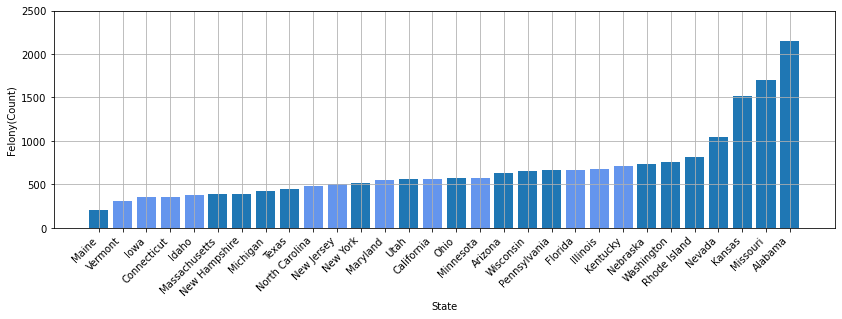

In [3]:
# 주 별 중범죄의 count를 보기 위해서 bar plot

plt.figure(figsize=(14,4))

for i in range(len(Traffic_data)):
    if Traffic_data['Traffic'][i]==0.0:
        plt.bar(Traffic_data['State'][i],Traffic_data['Felony_Result'][i],color='cornflowerblue', label='no Traffic')
    else :
        plt.bar(Traffic_data['State'][i],Traffic_data['Felony_Result'][i], color='#1f77b4', label='Traffic') 
        
#plt.legend()
plt.ylim(0,2500)
plt.xlabel('State')
plt.ylabel('Felony(Count)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# GDP

In [4]:
GDP_data=Data.filter(['State','GDP','Felony_Result'])
GDP_data=GDP_data.sort_values(by='GDP')
GDP_data=GDP_data.reset_index()
#GDP_data

기울기 :  [-8.74877143e-05]
절편 :  727.3639733394208


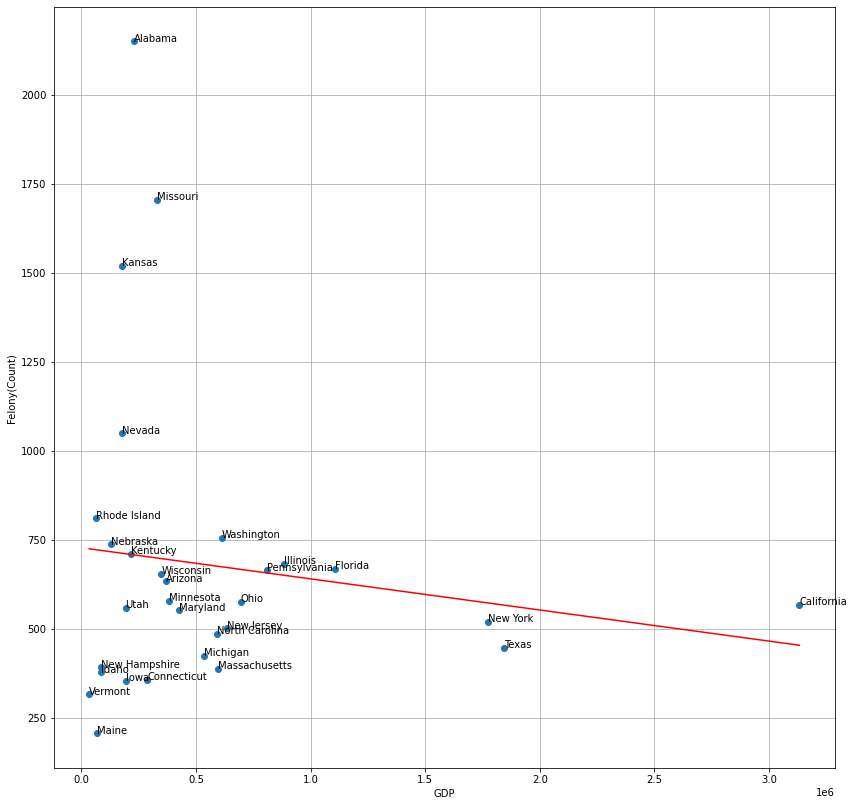

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plt.plot(GDP_data['GDP'],GDP_data['Felony_Result'],'o')

for i, txt in enumerate(GDP_data['State']):
    plt.annotate(txt, (GDP_data['GDP'][i], GDP_data['Felony_Result'][i]))


GDP_linear=LinearRegression()
GDP_linear.fit(GDP_data['GDP'].values.reshape(-1,1),GDP_data['Felony_Result'])
GDP_prediction=GDP_linear.predict(GDP_data['GDP'].values.reshape(-1,1))
plt.plot(GDP_data['GDP'],GDP_linear.predict(GDP_data['GDP'].values.reshape(-1,1)),color='r')


#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",GDP_linear.coef_)
print("절편 : ",GDP_linear.intercept_)
plt.xlabel('GDP')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [6]:
print('Score : ',GDP_linear.score(GDP_data['GDP'].values.reshape(-1,1),GDP_data['Felony_Result']))
print('MSE : ',mean_squared_error(GDP_prediction,GDP_data['Felony_Result']))
print('RMSE : ',mean_squared_error(GDP_prediction,GDP_data['Felony_Result'])**0.5)

Score :  0.018666114427740577
MSE :  170091.96361374744
RMSE :  412.4220697462097


In [7]:
GDP_body=pd.DataFrame({'Felony':GDP_data['Felony_Result'],'GDP':GDP_data['GDP']})
log_GDP_body=pd.DataFrame({'Felony':np.log(GDP_data['Felony_Result']),'GDP':np.log(GDP_data['GDP'])})

GDP_spearmanr_corr=stats.spearmanr(GDP_body.GDP,GDP_body.Felony)
log_GDP_spearmanr_corr=stats.spearmanr(log_GDP_body.GDP,log_GDP_body.Felony)

print('spearmanr_corr : {}'.format(GDP_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_GDP_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.059844271412680755, pvalue=0.7534190208543121)
log spearmanr_corr : SpearmanrResult(correlation=0.059844271412680755, pvalue=0.7534190208543121)


In [8]:
GDP_pearson_corr=GDP_body.corr(method='pearson')
GDP_pearson_corr

,Felony,GDP
Felony,1.000000,-0.136624
GDP,-0.136624,1.000000


In [9]:
log_GDP_pearson_corr=log_GDP_body.corr(method='pearson')
log_GDP_pearson_corr

,Felony,GDP
Felony,1.000000,0.096375
GDP,0.096375,1.000000


# Education(money)

In [10]:
Education_data=Data.filter(['State','Education','Education_Rank','Felony_Result'])
Education_data=Education_data.sort_values(by='Education')
Education_data=Education_data.reset_index()
#Education_data

기울기 :  [-0.03265097]
절편 :  1116.5481292746706


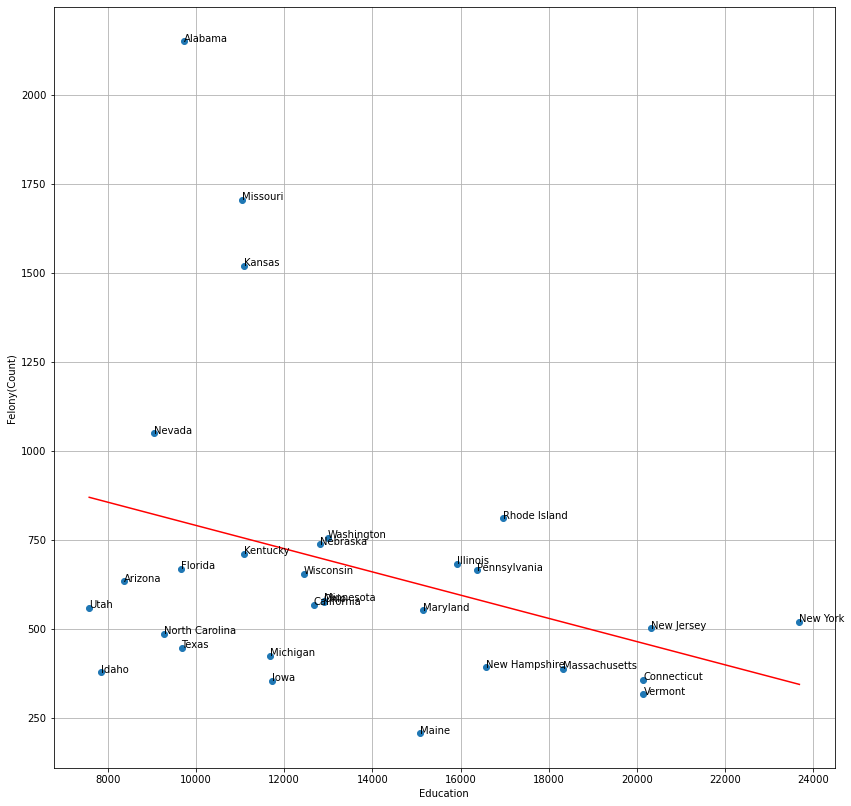

In [11]:
plt.figure(figsize=(14,14))
plt.plot(Education_data['Education'],Education_data['Felony_Result'],'o')

for i, txt in enumerate(Education_data['State']):
    plt.annotate(txt, (Education_data['Education'][i], Education_data['Felony_Result'][i]))


Education_linear=LinearRegression()
Education_linear.fit(Education_data['Education'].values.reshape(-1,1),Education_data['Felony_Result'])
Education_prediction=Education_linear.predict(Education_data['Education'].values.reshape(-1,1))
plt.plot(Education_data['Education'],Education_linear.predict(Education_data['Education'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",Education_linear.coef_)
print("절편 : ",Education_linear.intercept_)
plt.xlabel('Education')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [12]:
print('score : ',Education_linear.score(Education_data['Education'].values.reshape(-1,1),Education_data['Felony_Result']))
print('MSE : ',mean_squared_error(Education_prediction,Education_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Education_prediction,Education_data['Felony_Result'])**0.5)

score :  0.10348726578100098
MSE :  155390.14153079584
RMSE :  394.1955625457951


In [13]:
Education_body=pd.DataFrame({'Felony':Education_data['Felony_Result'],'Education':Education_data['Education']})
log_Education_body=pd.DataFrame({'Felony':np.log(Education_data['Felony_Result']),'Education':np.log(Education_data['Education'])})

Education_spearmanr_corr=stats.spearmanr(Education_body.Education,Education_body.Felony)
log_Education_spearmanr_corr=stats.spearmanr(log_Education_body.Education,log_Education_body.Felony)

print('spearmanr_corr : {}'.format(Education_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Education_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.27875417130144603, pvalue=0.13578511553789813)
log spearmanr_corr : SpearmanrResult(correlation=-0.27875417130144603, pvalue=0.13578511553789813)


In [14]:
Education_pearson_corr=Education_body.corr(method='pearson')
Education_pearson_corr

,Felony,Education
Felony,1.000000,-0.321694
Education,-0.321694,1.000000


In [15]:
log_Education_pearson_corr=log_Education_body.corr(method='pearson')
log_Education_pearson_corr

,Felony,Education
Felony,1.000000,-0.327587
Education,-0.327587,1.000000


# Happy

In [16]:
Happy_data=Data.filter(['State','Happy','Felony_Result'])
Happy_data=Happy_data.sort_values(by='Happy')
Happy_data=Happy_data.reset_index()
#Happy_data

기울기 :  [-28.60789746]
절편 :  2221.951858389239


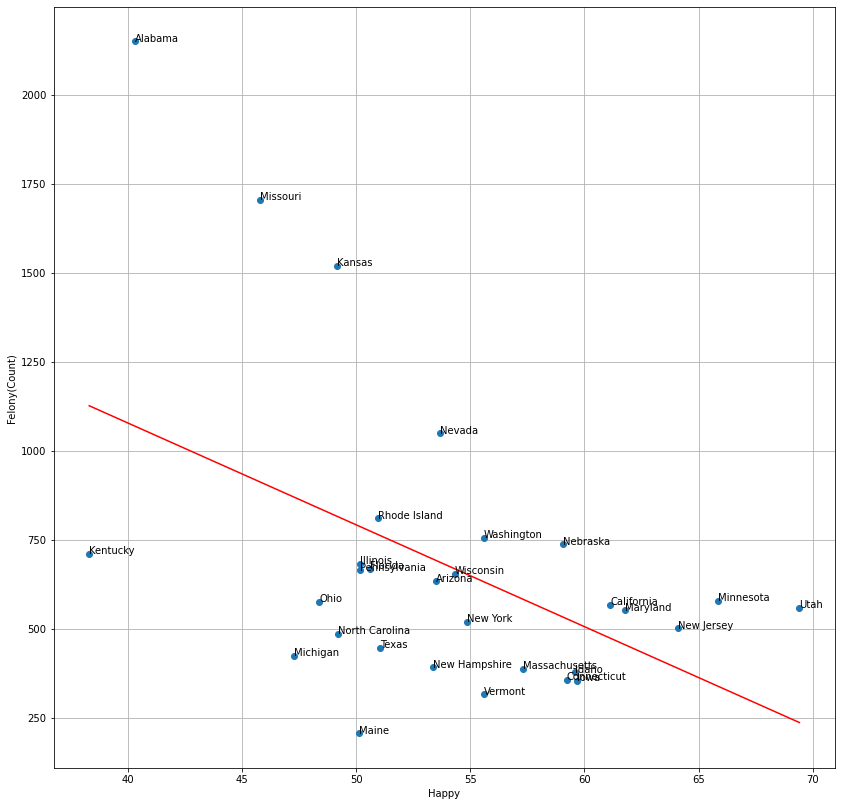

In [17]:
plt.figure(figsize=(14,14))
plt.plot(Happy_data['Happy'],Happy_data['Felony_Result'],'o')

for i, txt in enumerate(Happy_data['State']):
    plt.annotate(txt, (Happy_data['Happy'][i], Happy_data['Felony_Result'][i]))


Happy_linear=LinearRegression()
Happy_linear.fit(Happy_data['Happy'].values.reshape(-1,1),Happy_data['Felony_Result'])
Happy_prediction=Happy_linear.predict(Happy_data['Happy'].values.reshape(-1,1))
plt.plot(Happy_data['Happy'],Happy_linear.predict(Happy_data['Happy'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",Happy_linear.coef_)
print("절편 : ",Happy_linear.intercept_)
plt.xlabel('Happy')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [18]:
print('score : ',Happy_linear.score(Happy_data['Happy'].values.reshape(-1,1),Happy_data['Felony_Result']))
print('MSE : ',mean_squared_error(Happy_prediction,Happy_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Happy_prediction,Happy_data['Felony_Result'])**0.5)

score :  0.2244744552432255
MSE :  134419.7573116289
RMSE :  366.63300084911737


In [19]:
Happy_body=pd.DataFrame({'Felony':Happy_data['Felony_Result'],'Happy':Happy_data['Happy']})
log_Happy_body=pd.DataFrame({'Felony':np.log(Happy_data['Felony_Result']),'Happy':np.log(Happy_data['Happy'])})

Happy_spearmanr_corr=stats.spearmanr(Happy_body.Happy,Happy_body.Felony)
log_Happy_spearmanr_corr=stats.spearmanr(log_Happy_body.Happy,log_Happy_body.Felony)

print('spearmanr_corr : {}'.format(Happy_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Happy_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.37441601779755285, pvalue=0.04150548297781971)
log spearmanr_corr : SpearmanrResult(correlation=-0.37441601779755285, pvalue=0.04150548297781971)


In [20]:
Happy_pearson_corr=Happy_body.corr(method='pearson')
Happy_pearson_corr

,Felony,Happy
Felony,1.000000,-0.473787
Happy,-0.473787,1.000000


In [21]:
log_Happy_pearson_corr=log_Happy_body.corr(method='pearson')
log_Happy_pearson_corr

,Felony,Happy
Felony,1.000000,-0.423357
Happy,-0.423357,1.000000


# PCPI

In [22]:
PCPI_data=Data.filter(['State','PCPI','Felony_Result'])
PCPI_data=PCPI_data.sort_values(by='PCPI')
PCPI_data=PCPI_data.reset_index()
#PCPI_data

기울기 :  [-0.01542441]
절편 :  1544.217903787271


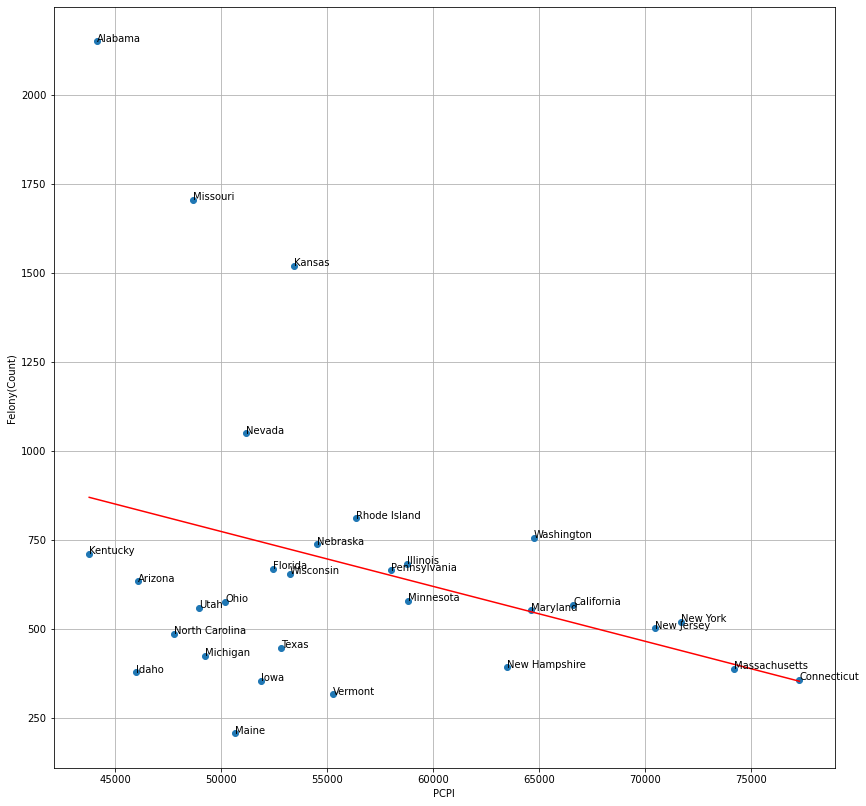

In [23]:
plt.figure(figsize=(14,14))
plt.plot(PCPI_data['PCPI'],PCPI_data['Felony_Result'],'o')

for i, txt in enumerate(PCPI_data['State']):
    plt.annotate(txt, (PCPI_data['PCPI'][i], PCPI_data['Felony_Result'][i]))


PCPI_linear=LinearRegression()
PCPI_linear.fit(PCPI_data['PCPI'].values.reshape(-1,1),PCPI_data['Felony_Result'])
PCPI_prediction=PCPI_linear.predict(PCPI_data['PCPI'].values.reshape(-1,1))
plt.plot(PCPI_data['PCPI'],PCPI_linear.predict(PCPI_data['PCPI'].values.reshape(-1,1)),color='r')

#plt.xscale('log')
#plt.yscale('log')
print("기울기 : ",PCPI_linear.coef_)
print("절편 : ",PCPI_linear.intercept_)
plt.xlabel('PCPI')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [24]:
print('score : ',PCPI_linear.score(PCPI_data['PCPI'].values.reshape(-1,1),PCPI_data['Felony_Result']))
print('MSE : ',mean_squared_error(PCPI_prediction,PCPI_data['Felony_Result']))
print('RMSE : ',mean_squared_error(PCPI_prediction,PCPI_data['Felony_Result'])**0.5)

score :  0.11117224016057314
MSE :  154058.12558621189
RMSE :  392.5023892745264


In [25]:
PCPI_body=pd.DataFrame({'Felony':PCPI_data['Felony_Result'],'PCPI':PCPI_data['PCPI']})
log_PCPI_body=pd.DataFrame({'Felony':np.log(PCPI_data['Felony_Result']),'PCPI':np.log(PCPI_data['PCPI'])})
                       
PCPI_spearmanr_corr=stats.spearmanr(PCPI_body.PCPI,PCPI_body.Felony)
log_PCPI_spearmanr_corr=stats.spearmanr(log_PCPI_body.PCPI,log_PCPI_body.Felony)
                       
print('spearmanr_corr : {}'.format(PCPI_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_PCPI_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)
log spearmanr_corr : SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)


In [26]:
PCPI_pearson_corr=PCPI_body.corr(method='pearson')
PCPI_pearson_corr

,Felony,PCPI
Felony,1.000000,-0.333425
PCPI,-0.333425,1.000000


In [27]:
log_PCPI_pearson_corr=log_PCPI_body.corr(method='pearson')
log_PCPI_pearson_corr

,Felony,PCPI
Felony,1.000000,-0.291892
PCPI,-0.291892,1.000000


# Area_Police

In [28]:
Police_area_data=Data.filter(['State','Police_area','Felony_Result'])
Police_area_data=Police_area_data.sort_values(by='Police_area')
Police_area_data=Police_area_data.reset_index()
#Police_area_data

기울기 :  [-10.6656635]
절편 :  687.5302533300579


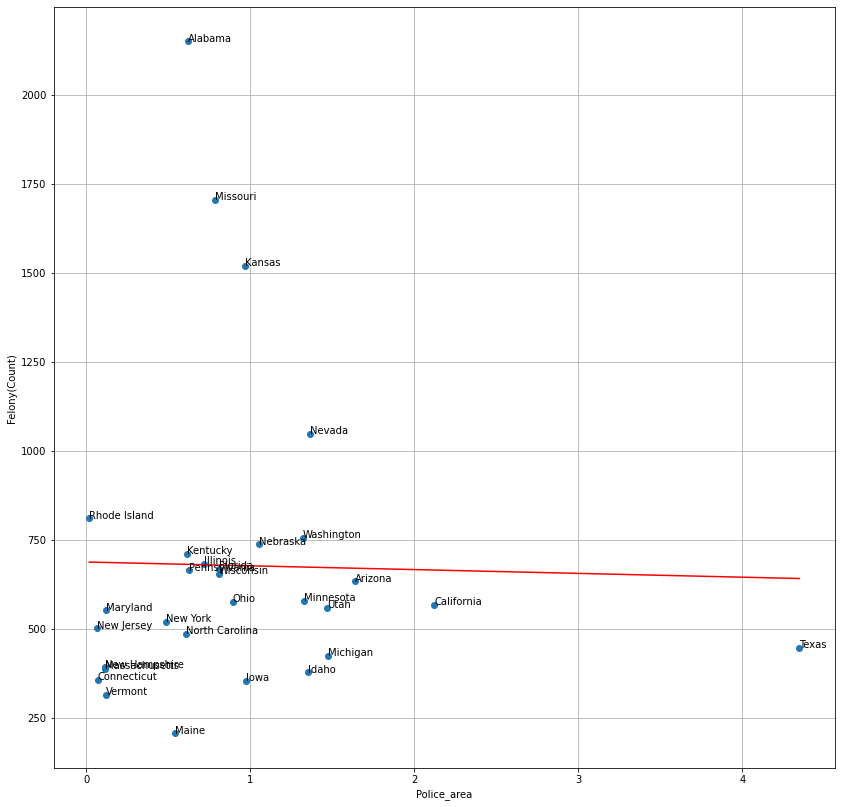

In [29]:
plt.figure(figsize=(14,14))
plt.plot(Police_area_data['Police_area'],Police_area_data['Felony_Result'],'o')

for i, txt in enumerate(Police_area_data['State']):
    plt.annotate(txt, (Police_area_data['Police_area'][i], Police_area_data['Felony_Result'][i]))


Police_area_linear=LinearRegression()
Police_area_linear.fit(Police_area_data['Police_area'].values.reshape(-1,1),Police_area_data['Felony_Result'])
Police_area_prediction=Police_area_linear.predict(Police_area_data['Police_area'].values.reshape(-1,1))
plt.plot(Police_area_data['Police_area'],Police_area_linear.predict(Police_area_data['Police_area'].values.reshape(-1,1)),color='r')

print("기울기 : ",Police_area_linear.coef_)
print("절편 : ",Police_area_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Police_area')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [30]:
print('score : ',Police_area_linear.score(Police_area_data['Police_area'].values.reshape(-1,1),Police_area_data['Felony_Result']))
print('MSE : ',mean_squared_error(Police_area_prediction,Police_area_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Police_area_prediction,Police_area_data['Felony_Result'])**0.5)

score :  0.00045243267931094344
MSE :  173248.8920952496
RMSE :  416.23177689269426


In [31]:
Police_area_body=pd.DataFrame({'Felony':Police_area_data['Felony_Result'],'Police_area':Police_area_data['Police_area']})
log_Police_area_body=pd.DataFrame({'Felony':np.log(Police_area_data['Felony_Result']),'Police_area':np.log(Police_area_data['Police_area'])})

Police_area_spearmanr_corr=stats.spearmanr(Police_area_body.Police_area,Police_area_body.Felony)
log_Police_area_spearmanr_corr=stats.spearmanr(log_Police_area_body.Police_area,log_Police_area_body.Felony)

print('spearmanr_corr : {}'.format(Police_area_spearmanr_corr))
print('log spearmanr_corr : {}'.format(log_Police_area_spearmanr_corr))

spearmanr_corr : SpearmanrResult(correlation=0.1804226918798665, pvalue=0.3400401726309277)
log spearmanr_corr : SpearmanrResult(correlation=0.1804226918798665, pvalue=0.3400401726309277)


In [32]:
Police_area_pearson_corr=Police_area_body.corr(method='pearson')
Police_area_pearson_corr

,Felony,Police_area
Felony,1.00000,-0.02127
Police_area,-0.02127,1.00000


In [33]:
log_Police_area_pearson_corr=log_Police_area_body.corr(method='pearson')
log_Police_area_pearson_corr

,Felony,Police_area
Felony,1.000000,0.175469
Police_area,0.175469,1.000000


# MSA

In [34]:
MSA_data=Data.filter(['State','Felony_Result','MSA_Rate'])
MSA_data=MSA_data.sort_values(by='MSA_Rate')
MSA_data=MSA_data.reset_index()
#MSA_data

기울기 :  [-0.18735903]
절편 :  692.9564312129561


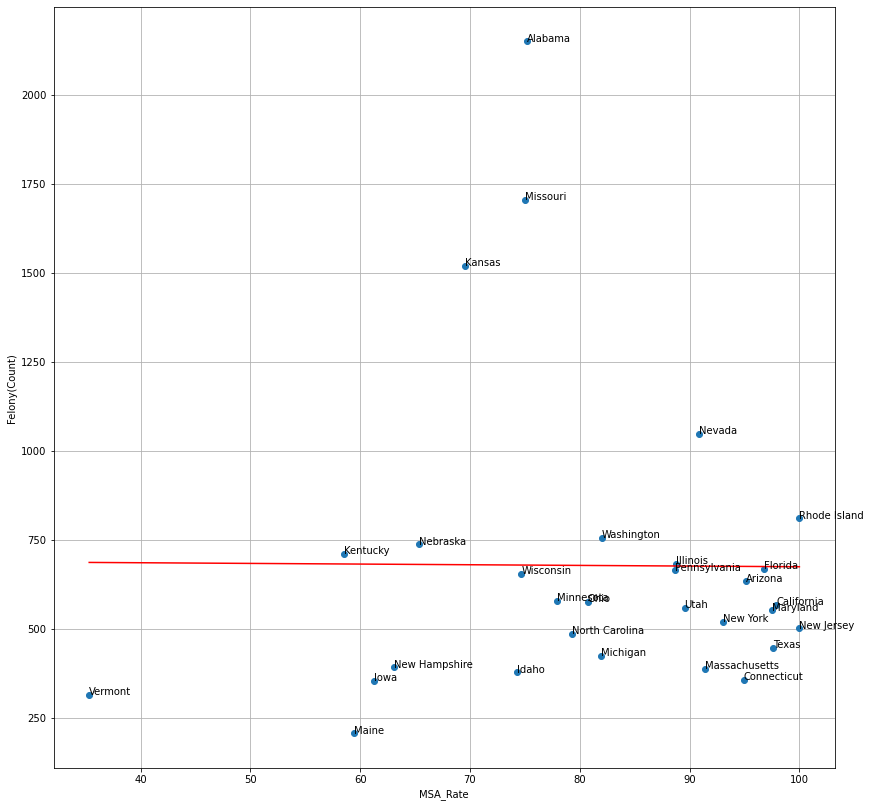

In [35]:
plt.figure(figsize=(14,14))
plt.plot(MSA_data['MSA_Rate'],MSA_data['Felony_Result'],'o')

for i, txt in enumerate(MSA_data['State']):
    plt.annotate(txt, (MSA_data['MSA_Rate'][i], MSA_data['Felony_Result'][i]))


MSA_linear=LinearRegression()
MSA_linear.fit(MSA_data['MSA_Rate'].values.reshape(-1,1),MSA_data['Felony_Result'])
MSA_prediction=MSA_linear.predict(MSA_data['MSA_Rate'].values.reshape(-1,1))
plt.plot(MSA_data['MSA_Rate'],MSA_linear.predict(MSA_data['MSA_Rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",MSA_linear.coef_)
print("절편 : ",MSA_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('MSA_Rate')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [36]:
print('score : ',MSA_linear.score(MSA_data['MSA_Rate'].values.reshape(-1,1),MSA_data['Felony_Result']))
print('MSE : ',mean_squared_error(MSA_prediction,MSA_data['Felony_Result']))
print('RMSE : ',mean_squared_error(MSA_prediction,MSA_data['Felony_Result'])**0.5)

score :  4.762415322956404e-05
MSE :  173319.05646855934
RMSE :  416.3160535801608


In [37]:
MSA_body=pd.DataFrame({'Felony':MSA_data['Felony_Result'],'MSA':MSA_data['MSA_Rate']})
log_MSA_body=pd.DataFrame({'Felony':np.log(MSA_data['Felony_Result']),'MSA':np.log(MSA_data['MSA_Rate'])})

MSA_spearmanor_corr=stats.spearmanr(MSA_body.MSA,MSA_body.Felony)
log_MSA_spearmanor_corr=stats.spearmanr(log_MSA_body.MSA,log_MSA_body.Felony)

print('spearmanr_corr : {}'.format(MSA_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_MSA_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.09478251254557114, pvalue=0.6183360192097268)
log spearmanr_corr : SpearmanrResult(correlation=0.09478251254557114, pvalue=0.6183360192097268)


In [38]:
MSA_pearson_corr=MSA_body.corr(method='pearson')
MSA_pearson_corr

,Felony,MSA
Felony,1.000000,-0.006901
MSA,-0.006901,1.000000


In [39]:
log_MSA_pearson_corr=log_MSA_body.corr(method='pearson')
log_MSA_pearson_corr

,Felony,MSA
Felony,1.000000,0.193958
MSA,0.193958,1.000000


# Old_Rate

In [40]:
Old_age_data=Data.filter(['State','Felony_Result','older_rate'])
Old_age_data=Old_age_data.sort_values(by='older_rate')
Old_age_data=Old_age_data.reset_index()
#Old_age_data

기울기 :  [-17.19938117]
절편 :  970.1347131539623


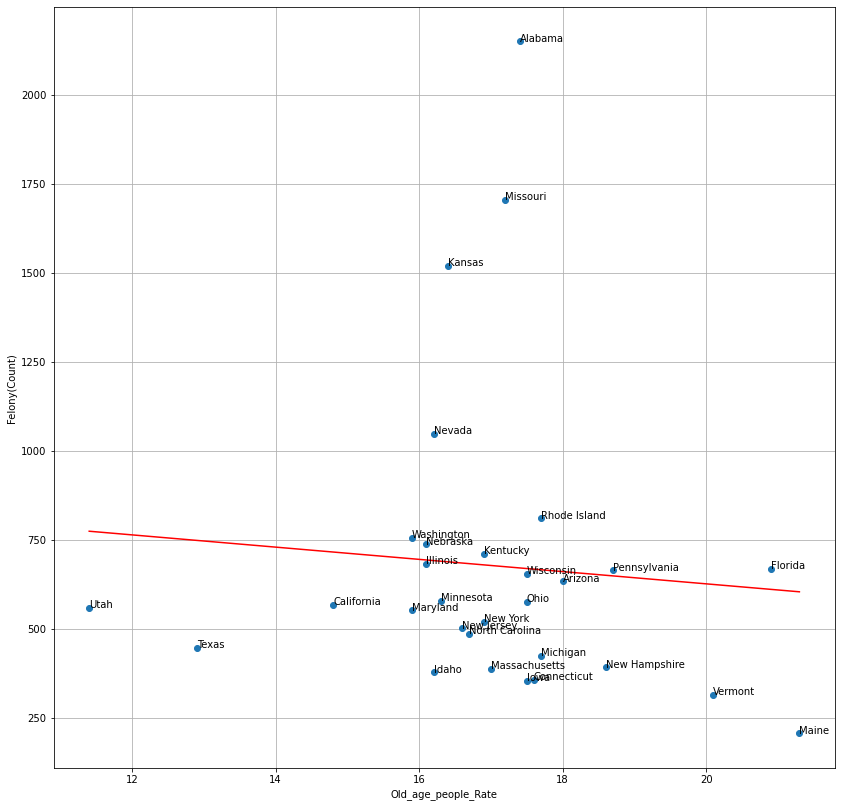

In [41]:
plt.figure(figsize=(14,14))
plt.plot(Old_age_data['older_rate'],Old_age_data['Felony_Result'],'o')

for i, txt in enumerate(Old_age_data['State']):
    plt.annotate(txt, (Old_age_data['older_rate'][i], Old_age_data['Felony_Result'][i]))


Old_age_linear=LinearRegression()
Old_age_linear.fit(Old_age_data['older_rate'].values.reshape(-1,1),Old_age_data['Felony_Result'])
Old_age_prediction=Old_age_linear.predict(Old_age_data['older_rate'].values.reshape(-1,1))
plt.plot(Old_age_data['older_rate'],Old_age_linear.predict(Old_age_data['older_rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",Old_age_linear.coef_)
print("절편 : ",Old_age_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Old_age_people_Rate')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [42]:
print('score : ',Old_age_linear.score(Old_age_data['older_rate'].values.reshape(-1,1),Old_age_data['Felony_Result']))
print('MSE : ',mean_squared_error(Old_age_prediction,Old_age_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Old_age_prediction,Old_age_data['Felony_Result'])**0.5)

score :  0.006343256244644269
MSE :  172227.8514868889
RMSE :  415.003435512152


In [43]:
Old_age_body=pd.DataFrame({'Felony':Old_age_data['Felony_Result'],'Old_age':Old_age_data['older_rate']})
log_Old_age_body=pd.DataFrame({'Felony':np.log(Old_age_data['Felony_Result']),'Old_age':np.log(Old_age_data['older_rate'])})

Old_age_spearmanor_corr=stats.spearmanr(Old_age_body.Old_age,Old_age_body.Felony)
log_Old_age_spearmanor_corr=stats.spearmanr(log_Old_age_body.Old_age,log_Old_age_body.Felony)

print('spearmanr_corr : {}'.format(Old_age_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Old_age_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.22180169248629789, pvalue=0.23880462909483827)
log spearmanr_corr : SpearmanrResult(correlation=-0.22180169248629789, pvalue=0.23880462909483827)


In [44]:
Old_age_pearson_corr=Old_age_body.corr(method='pearson')
Old_age_pearson_corr

,Felony,Old_age
Felony,1.000000,-0.079645
Old_age,-0.079645,1.000000


In [45]:
log_Old_age_pearson_corr=log_Old_age_body.corr(method='pearson')
log_Old_age_pearson_corr

,Felony,Old_age
Felony,1.000000,-0.163018
Old_age,-0.163018,1.000000


# Gender(Female_rate)

In [46]:
Gender_data=Data.filter(['State','Felony_Result','Female_Rate'])
Gender_data=Gender_data.sort_values(by='Female_Rate')
Gender_data=Gender_data.reset_index()
#Gender_data

기울기 :  [76.59772944]
절편 :  -3204.2276946762086


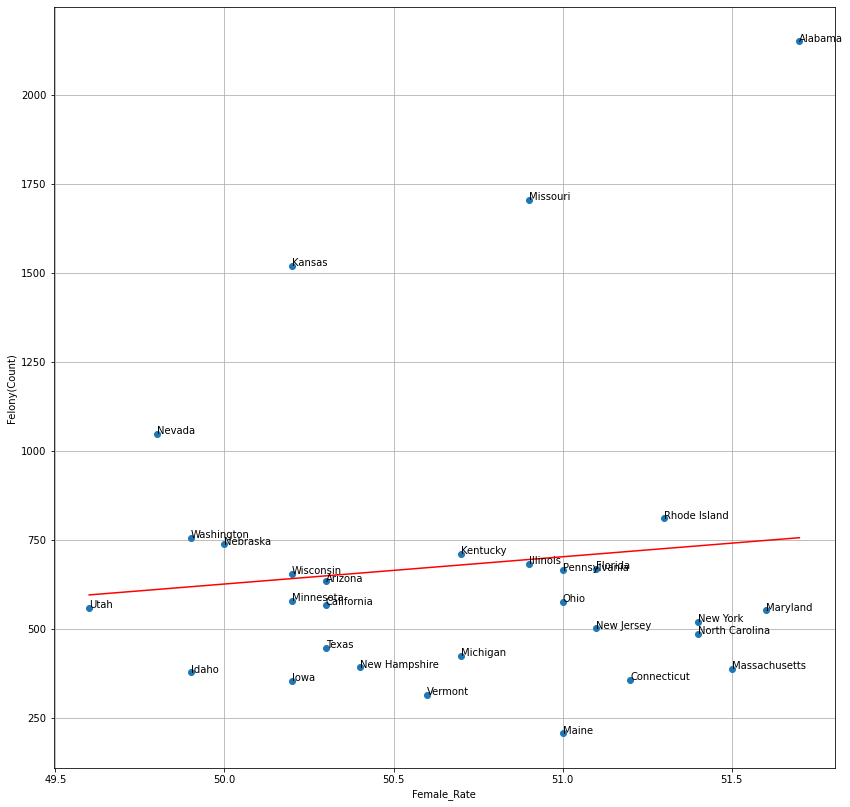

In [47]:
plt.figure(figsize=(14,14))
plt.plot(Gender_data['Female_Rate'],Gender_data['Felony_Result'],'o')

for i, txt in enumerate(Gender_data['State']):
    plt.annotate(txt, (Gender_data['Female_Rate'][i], Gender_data['Felony_Result'][i]))


Gender_linear=LinearRegression()
Gender_linear.fit(Gender_data['Female_Rate'].values.reshape(-1,1),Gender_data['Felony_Result'])
Gender_prediction=Gender_linear.predict(Gender_data['Female_Rate'].values.reshape(-1,1))
plt.plot(Gender_data['Female_Rate'],Gender_linear.predict(Gender_data['Female_Rate'].values.reshape(-1,1)),color='r')

print("기울기 : ",Gender_linear.coef_)
print("절편 : ",Gender_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Female_Rate')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [48]:
print('score : ',Gender_linear.score(Gender_data['Female_Rate'].values.reshape(-1,1),Gender_data['Felony_Result']))
print('MSE : ',mean_squared_error(Gender_prediction,Gender_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Gender_prediction,Gender_data['Felony_Result'])**0.5)

score :  0.011360220080566696
MSE :  171358.27463564873
RMSE :  413.95443545835906


In [49]:
Gender_body=pd.DataFrame({'Felony':Gender_data['Felony_Result'],'Female_Rate':Gender_data['Female_Rate']})
log_Gender_body=pd.DataFrame({'Felony':np.log(Gender_data['Felony_Result']),'Female_Rate':np.log(Gender_data['Female_Rate'])})

Gender_spearmanor_corr=stats.spearmanr(Gender_body.Female_Rate,Gender_body.Felony)
log_Gender_spearmanor_corr=stats.spearmanr(log_Gender_body.Female_Rate,log_Gender_body.Felony)

print('spearmanr_corr : {}'.format(Gender_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Gender_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=-0.09992226468343454, pvalue=0.5993334931069082)
log spearmanr_corr : SpearmanrResult(correlation=-0.09992226468343454, pvalue=0.5993334931069082)


In [50]:
Gender_pearson_corr=Gender_body.corr(method='pearson')
Gender_pearson_corr

,Felony,Female_Rate
Felony,1.000000,0.106584
Female_Rate,0.106584,1.000000


In [51]:
log_Gender_pearson_corr=log_Gender_body.corr(method='pearson')
log_Gender_pearson_corr

,Felony,Female_Rate
Felony,1.000000,0.013404
Female_Rate,0.013404,1.000000


# Travel

In [52]:
Travel_data=Data.filter(['State','Felony_Result','Traveler_spending'])
Travel_data=Travel_data.sort_values(by='Traveler_spending')
Travel_data=Travel_data.reset_index()
#Travel_data

기울기 :  [-0.00115882]
절편 :  711.0086062979472


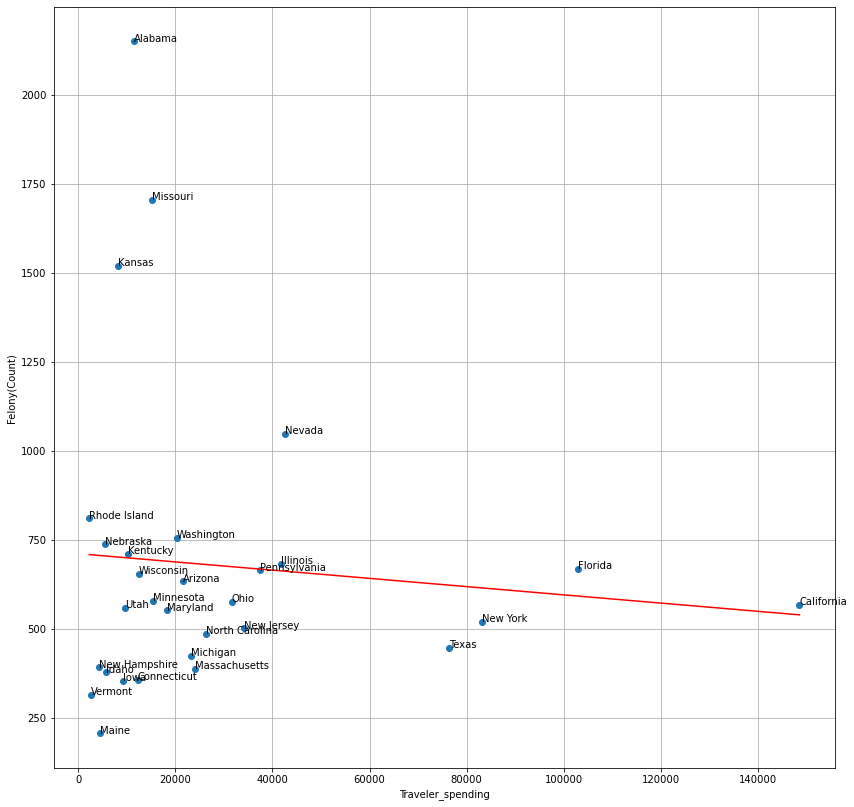

In [53]:
plt.figure(figsize=(14,14))
plt.plot(Travel_data['Traveler_spending'],Travel_data['Felony_Result'],'o')

for i, txt in enumerate(Travel_data['State']):
    plt.annotate(txt, (Travel_data['Traveler_spending'][i], Travel_data['Felony_Result'][i]))


Travel_linear=LinearRegression()
Travel_linear.fit(Travel_data['Traveler_spending'].values.reshape(-1,1),Travel_data['Felony_Result'])
Travel_prediction=Travel_linear.predict(Travel_data['Traveler_spending'].values.reshape(-1,1))
plt.plot(Travel_data['Traveler_spending'],Travel_linear.predict(Travel_data['Traveler_spending'].values.reshape(-1,1)),color='r')

print("기울기 : ",Travel_linear.coef_)
print("절편 : ",Travel_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Traveler_spending')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [54]:
print('score : ',Travel_linear.score(Travel_data['Traveler_spending'].values.reshape(-1,1),Travel_data['Felony_Result']))
print('MSE : ',mean_squared_error(Gender_prediction,Travel_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Gender_prediction,Travel_data['Felony_Result'])**0.5)

score :  0.008300311713286268
MSE :  177084.930255696
RMSE :  420.81460318731337


In [55]:
Travel_body=pd.DataFrame({'Felony':Travel_data['Felony_Result'],'Traveler_spending':Travel_data['Traveler_spending']})
log_Travel_body=pd.DataFrame({'Felony':np.log(Travel_data['Felony_Result']),'Traveler_spending':np.log(Travel_data['Traveler_spending'])})

Travel_spearmanor_corr=stats.spearmanr(Travel_body.Traveler_spending,Travel_body.Felony)
log_Travel_spearmanor_corr=stats.spearmanr(log_Travel_body.Traveler_spending,log_Travel_body.Felony)

print('spearmanr_corr : {}'.format(Travel_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Travel_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.12169076751946609, pvalue=0.521786771413325)
log spearmanr_corr : SpearmanrResult(correlation=0.12169076751946609, pvalue=0.521786771413325)


In [56]:
Travel_pearson_corr=Travel_body.corr(method='pearson')
Travel_pearson_corr

,Felony,Traveler_spending
Felony,1.000000,-0.091106
Traveler_spending,-0.091106,1.000000


In [57]:
log_Travel_pearson_corr=log_Travel_body.corr(method='pearson')
log_Travel_pearson_corr

,Felony,Traveler_spending
Felony,1.000000,0.109209
Traveler_spending,0.109209,1.000000


# Temperature

In [58]:
Temper_data=Data.filter(['State','Temper','Felony_Result'])
Temper_data=Temper_data.sort_values(by='Temper')
Temper_data=Temper_data.reset_index()
#Temper_data

기울기 :  [40.41582061]
절편 :  246.64314683080727


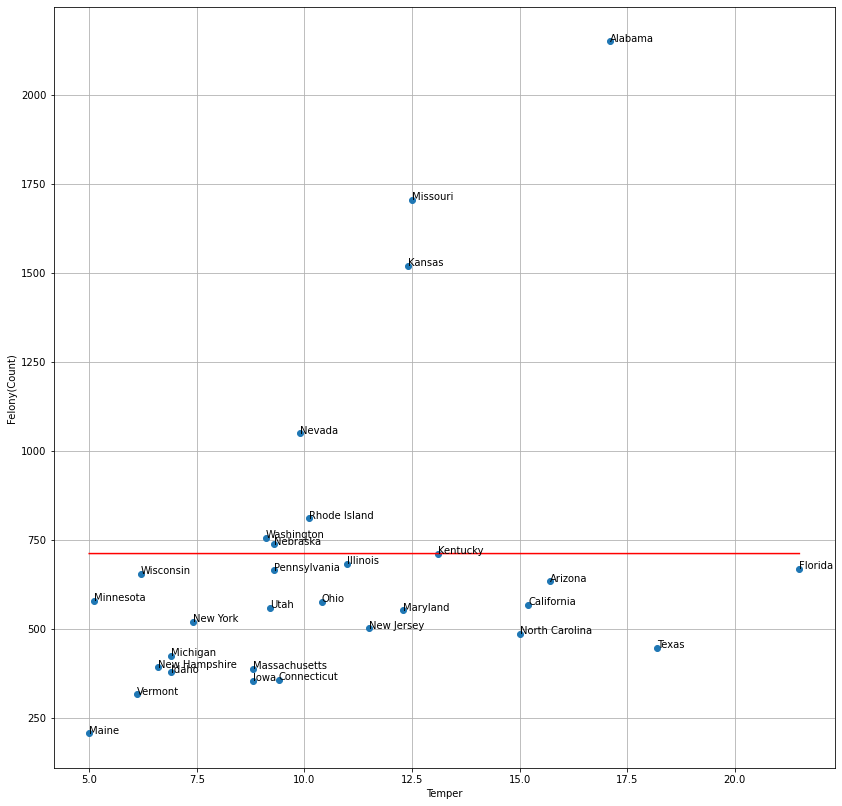

In [59]:
plt.figure(figsize=(14,14))
plt.plot(Temper_data['Temper'],Temper_data['Felony_Result'],'o')

for i, txt in enumerate(Temper_data['State']):
    plt.annotate(txt, (Temper_data['Temper'][i], Temper_data['Felony_Result'][i]))


Temper_linear=LinearRegression()
Temper_linear.fit(Temper_data['Temper'].values.reshape(-1,1),Temper_data['Felony_Result'])
Temper_prediction=Temper_linear.predict(Temper_data['Temper'].values.reshape(-1,1))
plt.plot(Temper_data['Temper'],Travel_linear.predict(Temper_data['Temper'].values.reshape(-1,1)),color='r')

print("기울기 : ",Temper_linear.coef_)
print("절편 : ",Temper_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Temper')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [60]:
print('score : ',Temper_linear.score(Temper_data['Temper'].values.reshape(-1,1),Temper_data['Felony_Result']))
print('MSE : ',mean_squared_error(Temper_prediction,Temper_data['Felony_Result']))
print('RMSE : ',mean_squared_error(Temper_prediction,Temper_data['Felony_Result'])**0.5)

score :  0.148681580783956
MSE :  147556.73243726583
RMSE :  384.13113963497653


In [61]:
Temper_body=pd.DataFrame({'Felony':Temper_data['Felony_Result'],'Temper':Temper_data['Temper']})
log_Temper_body=pd.DataFrame({'Felony':np.log(Temper_data['Felony_Result']),'Temper':np.log(Temper_data['Temper'])})

Temper_spearmanor_corr=stats.spearmanr(Temper_body.Temper,Temper_body.Felony)
log_Temper_spearmanor_corr=stats.spearmanr(log_Temper_body.Temper,log_Temper_body.Felony)

print('spearmanr_corr : {}'.format(Temper_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_Temper_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.47735620774711984, pvalue=0.007642098914405385)
log spearmanr_corr : SpearmanrResult(correlation=0.47735620774711984, pvalue=0.007642098914405385)


In [62]:
Temper_pearson_corr=Temper_body.corr(method='pearson')
Temper_pearson_corr

,Felony,Temper
Felony,1.000000,0.385593
Temper,0.385593,1.000000


In [63]:
log_Temper_pearson_corr=log_Temper_body.corr(method='pearson')
log_Temper_pearson_corr

,Felony,Temper
Felony,1.000000,0.489659
Temper,0.489659,1.000000


# Penalty

In [64]:
fel_aver_data=Data.filter(['State','Felony_sentence_aver','Felony_Result'])
fel_aver_data=fel_aver_data.sort_values(by='Felony_sentence_aver')
fel_aver_data=fel_aver_data.reset_index()

기울기 :  [-0.26638431]
절편 :  783.6149175249819


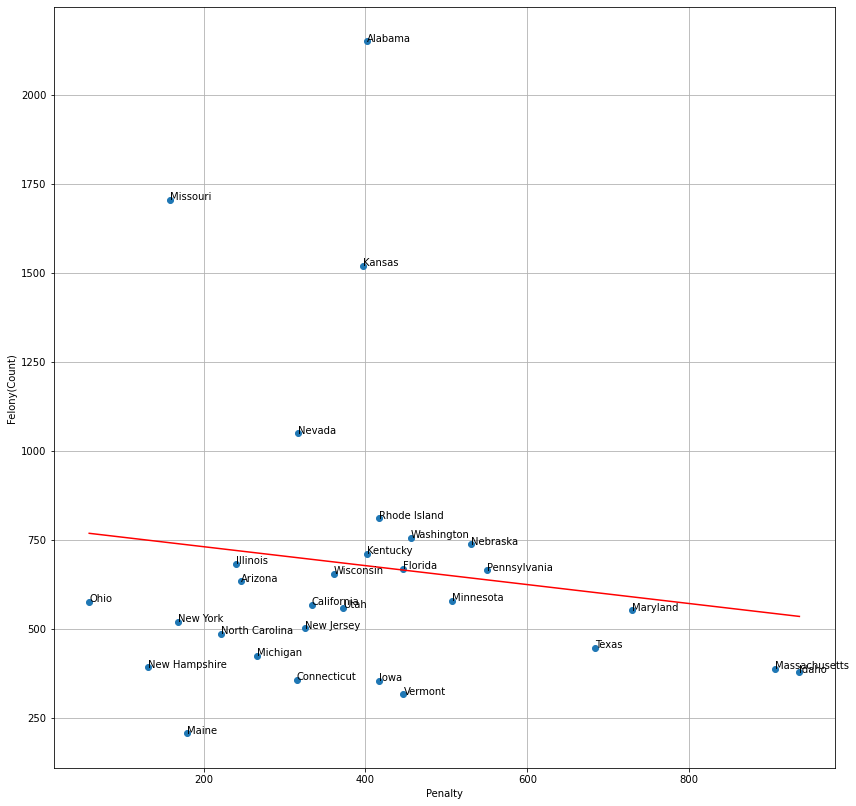

In [68]:
plt.figure(figsize=(14,14))
plt.plot(fel_aver_data['Felony_sentence_aver'],fel_aver_data['Felony_Result'],'o')
for i, txt in enumerate(fel_aver_data['State']):
    plt.annotate(txt, (fel_aver_data['Felony_sentence_aver'][i],fel_aver_data['Felony_Result'][i]))
    
fel_aver_linear=LinearRegression()
fel_aver_linear.fit(fel_aver_data['Felony_sentence_aver'].values.reshape(-1,1),fel_aver_data['Felony_Result'])
fel_aver_prediction=fel_aver_linear.predict(fel_aver_data['Felony_sentence_aver'].values.reshape(-1,1))
plt.plot(fel_aver_data['Felony_sentence_aver'],fel_aver_linear.predict(fel_aver_data['Felony_sentence_aver'].values.reshape(-1,1)),color='r')

print("기울기 : ",fel_aver_linear.coef_)
print("절편 : ",fel_aver_linear.intercept_)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Penalty')
plt.ylabel('Felony(Count)')
plt.grid(True)
plt.show()

In [69]:
print('score : ',fel_aver_linear.score(fel_aver_data['Felony_sentence_aver'].values.reshape(-1,1),fel_aver_data['Felony_Result']))
print('MSE : ',mean_squared_error(fel_aver_prediction,fel_aver_data['Felony_Result']))
print('RMSE : ',mean_squared_error(fel_aver_prediction,fel_aver_data['Felony_Result'])**0.5)

score :  0.017265433485557535
MSE :  170334.73987507392
RMSE :  412.71629465660055


In [70]:
fel_aver_body=pd.DataFrame({'Felony':fel_aver_data['Felony_Result'],'Felony_sentence_aver':fel_aver_data['Felony_sentence_aver']})
log_fel_aver_body=pd.DataFrame({'Felony':np.log(fel_aver_data['Felony_Result']),'Felony_sentence_aver':np.log(fel_aver_data['Felony_sentence_aver'])})

fel_aver_spearmanor_corr=stats.spearmanr(fel_aver_body.Felony_sentence_aver,fel_aver_body.Felony)
log_fel_aver_spearmanor_corr=stats.spearmanr(log_fel_aver_body.Felony_sentence_aver,log_fel_aver_body.Felony)

print('spearmanr_corr : {}'.format(fel_aver_spearmanor_corr))
print('log spearmanr_corr : {}'.format(log_fel_aver_spearmanor_corr))

spearmanr_corr : SpearmanrResult(correlation=0.0008901747463815757, pvalue=0.9962750877252801)
log spearmanr_corr : SpearmanrResult(correlation=0.0008901747463815757, pvalue=0.9962750877252801)


In [71]:
fel_aver_pearson_corr=fel_aver_body.corr(method='pearson')
fel_aver_pearson_corr

,Felony,Felony_sentence_aver
Felony,1.000000,-0.131398
Felony_sentence_aver,-0.131398,1.000000


In [72]:
log_fel_aver_pearson_corr=log_fel_aver_body.corr(method='pearson')
log_fel_aver_pearson_corr

,Felony,Felony_sentence_aver
Felony,1.000000,-0.023512
Felony_sentence_aver,-0.023512,1.000000


In [73]:
List=['GDP','Education','Happy','PCPI','Area_police','MSA','Old_rate','Gender','Travel','Temperature','Penalty']
Felony_spear=['-0.0598','-0.2787','-0.3744','-0.1573','0.1804','0.0947','-0.2218','-0.0999','0.1216','0.4773','0.0008']
pvalue_spear=['0.7534','0.1357','0.0415','0.2959','0.3400','0.6183','0.2388','0.5993','0.5217','0.0076','0.9962']
result_spear=pd.DataFrame({'Felony':Felony_spear,'p-value':pvalue_spear},index=List)
result_spear

,Felony,p-value
GDP,-0.0598,0.7534
Education,-0.2787,0.1357
Happy,-0.3744,0.0415
PCPI,-0.1573,0.2959
Area_police,0.1804,0.3400
MSA,0.0947,0.6183
Old_rate,-0.2218,0.2388
Gender,-0.0999,0.5993
Travel,0.1216,0.5217
Temperature,0.4773,0.0076
